In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
df = pd.read_csv(r'./data/MostStreamedSpotifySongs2024.csv', encoding='ISO-8859-1')

In [3]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [4]:
df["YouTube Views"] = (df["YouTube Views"].str.replace(",", "")).astype(float)

In [5]:
df["Release Date"] = pd.to_datetime(df["Release Date"])

In [6]:
df["All Time Rank"] = (df["All Time Rank"].str.replace(",", "")).astype(int, errors="ignore")

In [7]:
df["YouTube Likes"] = (df["YouTube Likes"].str.replace(",", "")).astype(float)
df["TikTok Posts"] = (df["TikTok Posts"].str.replace(",", "")).astype(float)
df["TikTok Likes"] = (df["TikTok Likes"].str.replace(",", "")).astype(float)
df["TikTok Views"] = (df["TikTok Views"].str.replace(",", "")).astype(float)

In [8]:
df["YouTube Playlist Reach"] = (df["YouTube Playlist Reach"].str.replace(",", "")).astype(float)

In [9]:
df.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int32
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                        float64
YouTube Likes                        float64
TikTok Posts                         float64
TikTok Likes                         float64
TikTok Views                         float64
YouTube Playlist Reach               float64
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [10]:
df["AirPlay Spins"].str.isnumeric().value_counts()

AirPlay Spins
False    2835
True     1267
Name: count, dtype: int64

In [11]:
(df["AirPlay Spins"].str.replace(",", "")).str.isnumeric()

0       True
1       True
2       True
3       True
4       True
        ... 
4595    True
4596    True
4597    True
4598    True
4599    True
Name: AirPlay Spins, Length: 4600, dtype: object

In [12]:
df["AirPlay Spins"] = df["AirPlay Spins"].str.replace(",", "").astype(float, errors="ignore")

In [13]:
df["AirPlay Spins"]

0         40975.0
1         40778.0
2         74333.0
3       1474799.0
4         12185.0
          ...    
4595          6.0
4596        412.0
4597        204.0
4598       1200.0
4599       2083.0
Name: AirPlay Spins, Length: 4600, dtype: float64

In [14]:
df["Release Date"].hasnans

False

In [15]:
df["Release Date"].value_counts().sort_values(ascending=True)

Release Date
2017-04-11     1
2021-01-31     1
2014-01-13     1
2020-12-06     1
2021-01-27     1
              ..
2014-01-01    28
2023-10-13    28
2024-04-12    29
2013-01-01    34
2012-01-01    38
Name: count, Length: 1562, dtype: int64

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [16]:
#I did it above. Nevertheless, cleaning has no end. :@ :@ :@

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [17]:
df["Artist"].value_counts()

Artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [18]:
df["Spotify Streams"] = df["Spotify Streams"].str.replace(",", "").astype(float, errors="ignore")

In [19]:
df["Spotify Streams"]

0       3.904709e+08
1       3.237039e+08
2       6.013093e+08
3       2.031281e+09
4       1.070349e+08
            ...     
4595    3.050500e+08
4596    5.228236e+07
4597    1.899727e+08
4598    1.454670e+08
4599    2.557407e+08
Name: Spotify Streams, Length: 4600, dtype: float64

In [20]:
df_special = df[["Spotify Streams", "Artist"]]

In [21]:
groups = df_special.groupby("Artist").sum()

In [22]:
groups.sort_values(by=["Spotify Streams"], ascending=False)

,Spotify Streams
Artist,
Bad Bunny,3.705483e+10
The Weeknd,3.694854e+10
Drake,3.496216e+10
Taylor Swift,3.447077e+10
Post Malone,2.613747e+10
...,...
Hassan Goldy,0.000000e+00
Hollywood Dots The Oncelor,0.000000e+00
Hot Lemon,0.000000e+00


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [23]:
df['year'] = df["Release Date"].dt.year

In [24]:
df_new_special = df[["year", "Track"]]

In [25]:
groupsTracksOfYears = df_new_special.groupby('year').count()

In [26]:
groupsTracksOfYears

,Track
year,
1987,1
1991,1
1994,1
1998,1
1999,1
2000,2
2001,1
2002,5
2003,3


In [27]:
years = df_new_special["year"].value_counts()

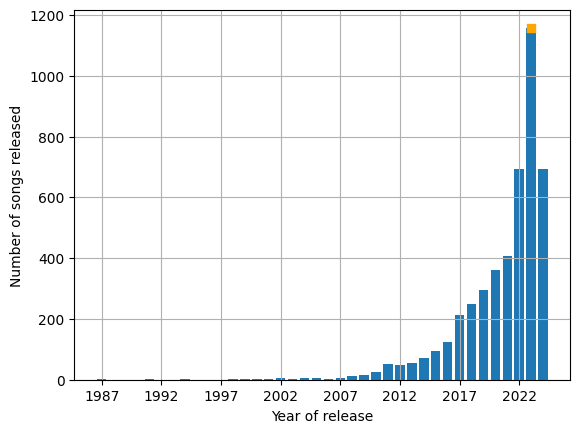

In [28]:
plt.bar(years.index, years)

plt.scatter(years.idxmax(), years.max(), marker = "s", color = "orange")

plt.xticks(range(1987, 2025, 5))
plt.grid()

plt.xlabel("Year of release")
plt.ylabel("Number of songs released")

plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [29]:
df_new_deezer = df[["year", "Deezer Playlist Count"]]
df_new_amazon = df[["year", "Amazon Playlist Count"]]

In [30]:
yearsDeezer = df_new_deezer["year"].value_counts()
yearsAmazon = df_new_amazon["year"].value_counts()

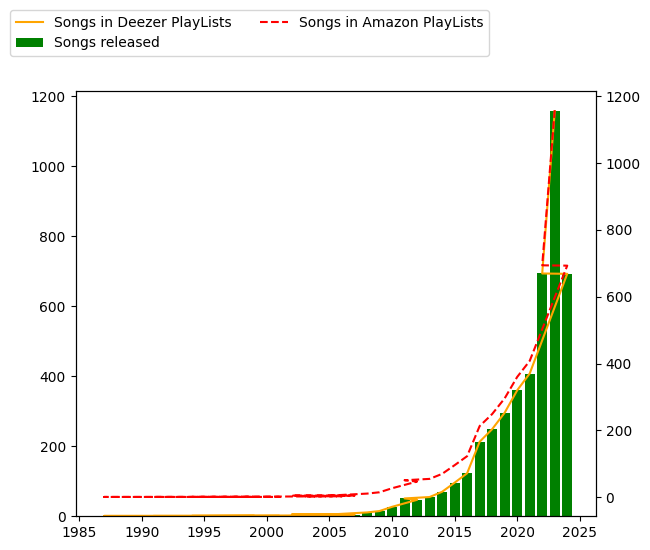

In [31]:
fig, ax1 = plt.subplots()

ax1.bar(years.index, years, label="Songs released", color="green")
ax1.plot(yearsDeezer, label = "Songs in Deezer PlayLists", linestyle="-", color="orange")

ax2 = ax1.twinx()

ax2.plot(yearsAmazon, label = "Songs in Amazon PlayLists", linestyle="--", color="red")

fig.tight_layout()

fig.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [46]:
df_new_ytViews = df[["year", "YouTube Views"]]
df_new_ytLikes = df[["year", "YouTube Likes"]]

In [47]:
yearsYtViews = df_new_ytViews["year"].value_counts()
yearsYtLikes = df_new_ytLikes["year"].value_counts()

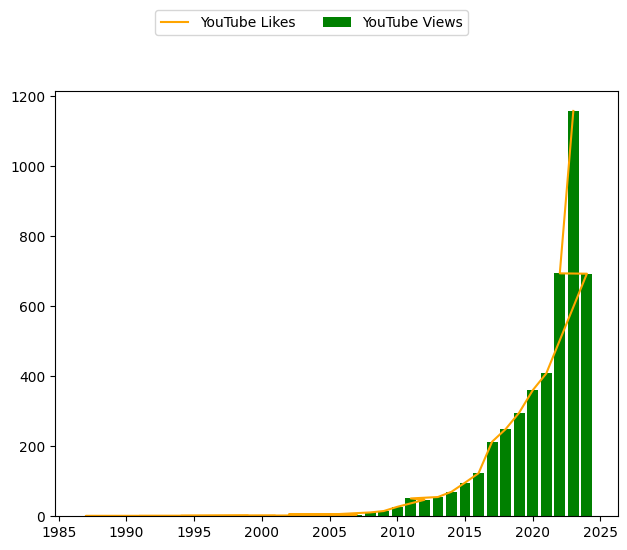

In [50]:
fig, ax = plt.subplots()

ax.bar(yearsYtViews.index, yearsYtViews, label="YouTube Views", color="green")

ax.plot(yearsYtLikes, label = "YouTube Likes", linestyle="-", color="orange")

fig.tight_layout()

fig.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

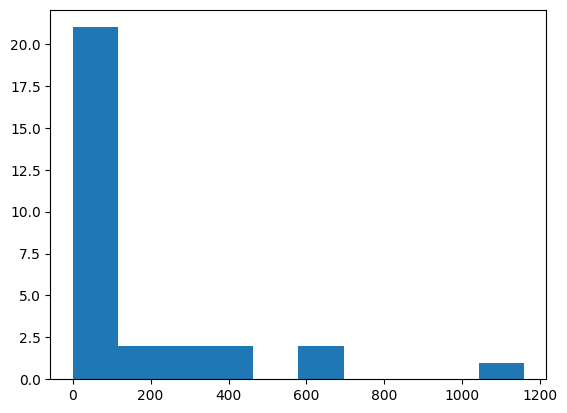

In [61]:
viewsHist = plt.hist(yearsYtViews)
plt.show()

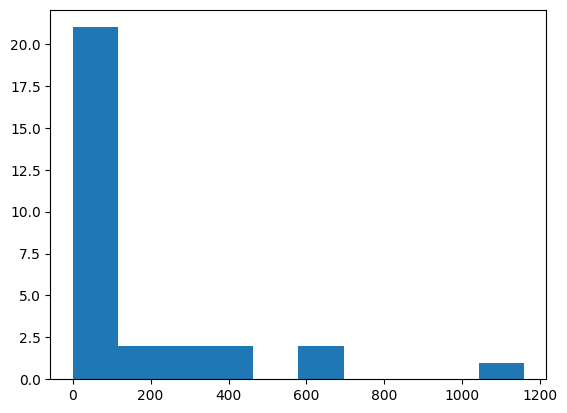

In [62]:
likesHist = plt.hist(yearsYtLikes)
plt.show()

In [72]:
yearsYtLikes[yearsYtLikes < 300]

year
2019    296
2018    249
2017    213
2016    123
2015     96
2014     70
2013     55
2011     51
2012     47
2010     27
2009     15
2008     11
2005      5
2004      5
2002      5
2007      5
2003      3
2006      3
2000      2
1994      1
1999      1
1987      1
1998      1
2001      1
1991      1
Name: count, dtype: int64

In [74]:
yearsYtLikes[yearsYtLikes < 300].mean()

51.48

In [75]:
yearsYtLikes[yearsYtLikes < 300].min()

1

In [76]:
yearsYtLikes[yearsYtLikes < 300].max()

296

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.